<a href="https://colab.research.google.com/github/boropx999/hello-world/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN1/money/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 330 images belonging to 11 classes.


In [ ]:
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/CNN1/money/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 226 images belonging to 11 classes.


In [ ]:
training_set.class_indices

{'1000': 0,
 '10000': 1,
 '100000': 2,
 '200': 3,
 '2000': 4,
 '20000': 5,
 '200000': 6,
 '500': 7,
 '5000': 8,
 '50000': 9,
 '500000': 10}

In [ ]:
model=Sequential()
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) # Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 256 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) # Tích chập 512 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                    

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=100,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
11/11 [==============================] - 8s 732ms/step - loss: 0.0255 - acc: 0.9909 - val_loss: 5.9453 - val_acc: 0.2257
Epoch 2/100
11/11 [==============================] - 7s 654ms/step - loss: 0.0321 - acc: 0.9909 - val_loss: 6.2705 - val_acc: 0.2212
Epoch 3/100
11/11 [==============================] - 7s 649ms/step - loss: 0.0104 - acc: 0.9939 - val_loss: 6.6941 - val_acc: 0.2257
Epoch 4/100
11/11 [==============================] - 7s 636ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 6.5621 - val_acc: 0.2611
Epoch 5/100
11/11 [==============================] - 7s 653ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 6.6065 - val_acc: 0.2345
Epoch 6/100
11/11 [==============================] - 7s 652ms/step - loss: 0.0237 - acc: 0.9939 - val_loss: 7.1253 - val_acc: 0.2080
Epoch 7/100
11/11 [==============================] - 7s 649ms/step - loss: 0.0137 - acc: 0.9939 - val_loss: 6.4516 - val_acc: 0.2389
Epoch 8/100
11/11 [==============================] - 7s 673ms/step - 

Sai số kiểm tra là:  5.2193922996521
Độ chính xác kiểm tra là:  0.2654867172241211


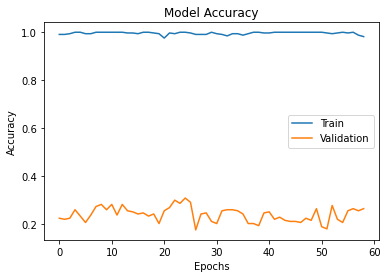

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show
score = model.evaluate(test_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])

In [ ]:
model.save("Final.h5")

In [ ]:
model_CNN=load_model('Final.h5')

[3]


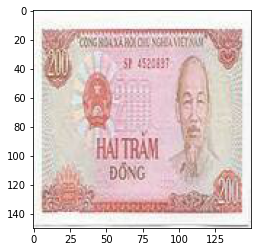

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/200/z.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/200/z.jpg')
imgplot = plt.imshow(img)
plt.show()

[7]


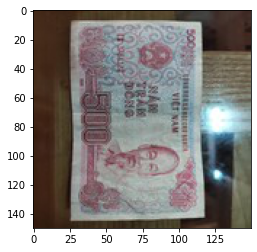

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/500/zz.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/500/zz.jpg')
imgplot = plt.imshow(img)
plt.show()

[0]


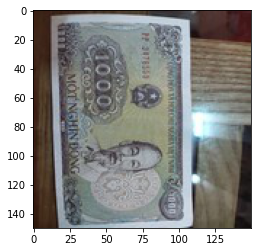

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/1000/zz.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/1000/zz.jpg')
imgplot = plt.imshow(img)
plt.show()

[4]


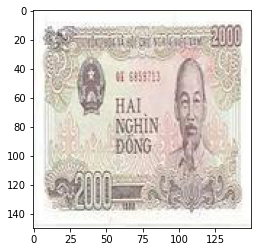

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/2000/z.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/2000/z.jpg')
imgplot = plt.imshow(img)
plt.show()

[8]


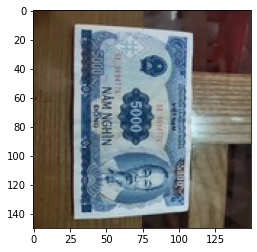

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/5000/zz.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/5000/zz.jpg')
imgplot = plt.imshow(img)
plt.show()

[1]


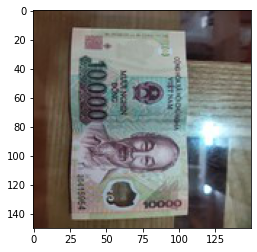

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/10000/zz.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/10000/zz.jpg')
imgplot = plt.imshow(img)
plt.show()

[5]


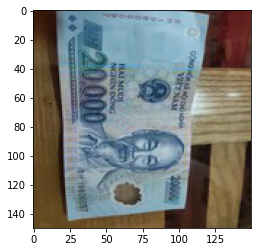

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/20000/zz.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/20000/zz.jpg')
imgplot = plt.imshow(img)
plt.show()

[9]


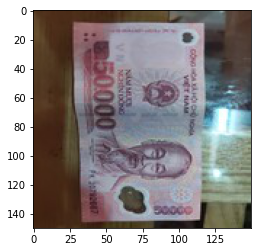

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/50000/zz.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/50000/zz.jpg')
imgplot = plt.imshow(img)
plt.show()

[2]


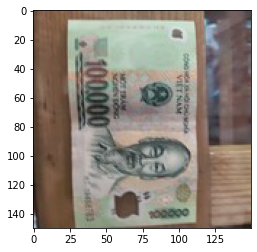

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/100000/zz.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/100000/zz.jpg')
imgplot = plt.imshow(img)
plt.show()

[6]


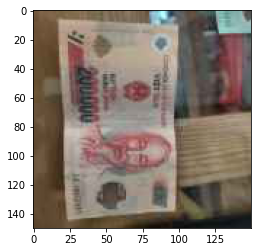

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/200000/200.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/200000/200.jpg')
imgplot = plt.imshow(img)
plt.show()

[10]


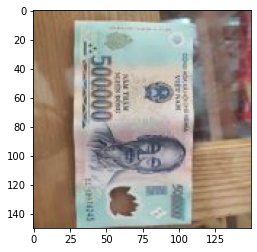

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/CNN1/money/validation/500000/here.jpg')
img = image.img_to_array(test_image)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kqua = np.argmax(model_CNN.predict(img),axis=1)
print(kqua)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/CNN1/money/validation/500000/here.jpg')
imgplot = plt.imshow(img)
plt.show()